# Overview

This week is about getting familiar with networks, and we'll focus on four main elements

* Basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time time today to tell you about them.

> **_Video Lecture_**. Start by watching the "History of Networks". 


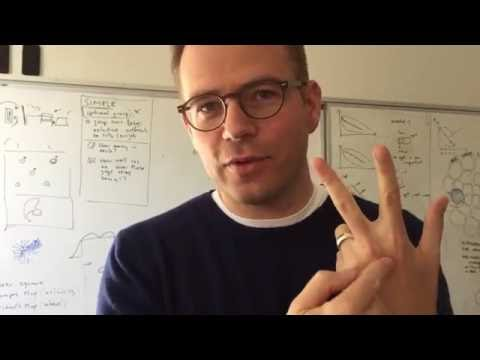

In [48]:
from IPython.display import YouTubeVideo
YouTubeVideo("qjM9yMarl70",width=800, height=450)

> **_Video Lecture_**. Then check out a few comments on "Network Notation". 

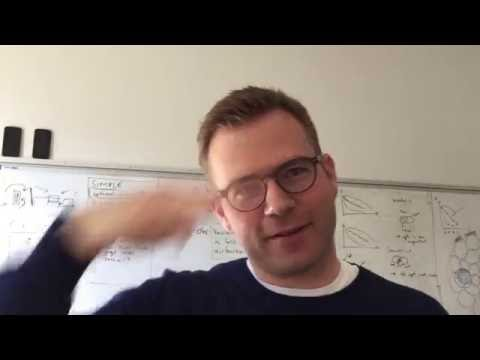

In [49]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
> 
> * Read chapter 1\.
> * Read chapter 2\.
> 

> _Exercises_  
> _Chapter 1_ (Don't forget that you should be answering these in an IPython notebook.) 
> 
> * List three different real networks and state the nodes and links for each of them.

### Internet:
- **Nodes**: Individual websites or IP addresses.
- **Links**: Hyperlinks or routes connecting these websites.

### Transportation System (e.g., airline network):
- **Nodes**: Airports.
- **Links**: Flight routes between airports.

### Social Network (e.g., Facebook):
- **Nodes**: Users.
- **Links**: Friendships or interactions between users.

> * Tell us of the network you are personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 
> * In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 


### Human brain's neuronal network:
- **Nodes**: Neurons.
- **Links**: Synaptic connections between neurons.
- **Size**: The human brain contains approximately 86 billion neurons with a much higher number of synaptic connections (trillions).
- **Can it be mapped out?**: Partially. We have techniques like fMRI, DTI, and others to visualize and map brain activity and connections, but we are far from mapping every single neuronal connection.
- **Why do I care about it?**: Understanding the human brain's network can revolutionize our knowledge about cognitive functions, pathologies like Alzheimer's, and the essence of consciousness.

## 3. Impact of network science in the next decade:

Given the increasing digital connectivity and rapid technological advancements, network science's biggest impact might be in **Cybersecurity and Information Systems**. The book's text indicates the importance of understanding networks to safeguard against vulnerabilities. By understanding the network structure of our digital ecosystems, we can better predict vulnerabilities, protect against potential threats, and ensure the seamless flow of information.

> _Chapter 2_
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.
>
## Real network with many connections:

A classic example is the **neural network in C. elegans**, a type of nematode. Its nervous system has been completely mapped, and each neuron has many connections.
  
Is it still sparse? The term "sparse" is relative. Even if a node in a network has many connections, the network can still be sparse if the number of actual connections is significantly smaller than the maximum number of possible connections. For C. elegans, which has 302 neurons, if every neuron were connected to every other neuron, there would be roughly 45,000 potential connections. In reality, there are about 7,000 synaptic connections, making it relatively sparse.

In essence, the key takeaway is that "sparsity" in networks isn't about the absolute number of connections but is rather relative to the potential number of connections.


# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book using `NetworkX`

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 
>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-diagonal" (all elements are away from the diagonal blocks). *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipatite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).
> 

### Exercise solution:
- **2.1**: Start at A, cross to B
From B, cross the new bridge to C
From C, cross to D
From D, cross to A
From A, cross to C
From C, cross to B
From B, cross to A
From A, cross to D


- **2.3**:


In [50]:
from IPython.display import Image
Image(url='http://networksciencebook.com/images/ch-02/figure-2-1.jpg',width=800)


Graph with 6 nodes and 7 edges


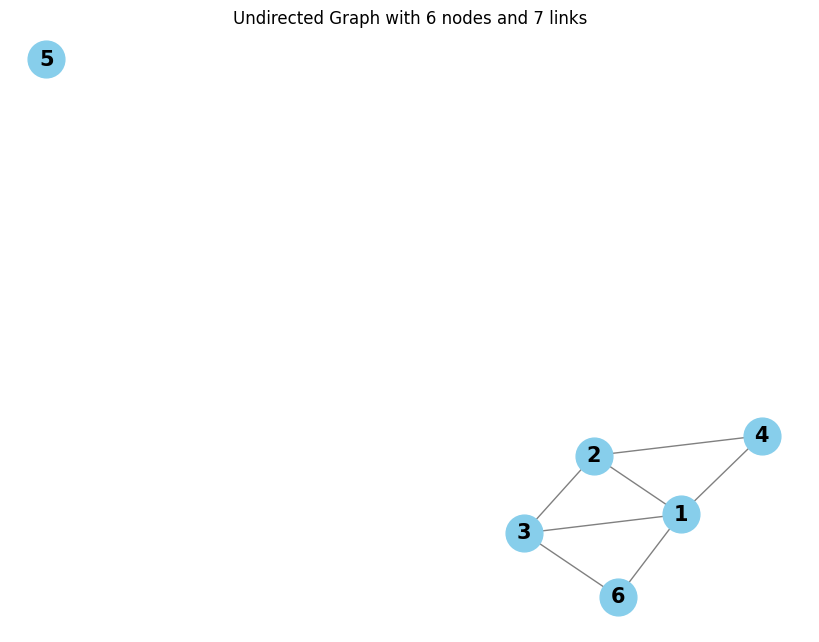

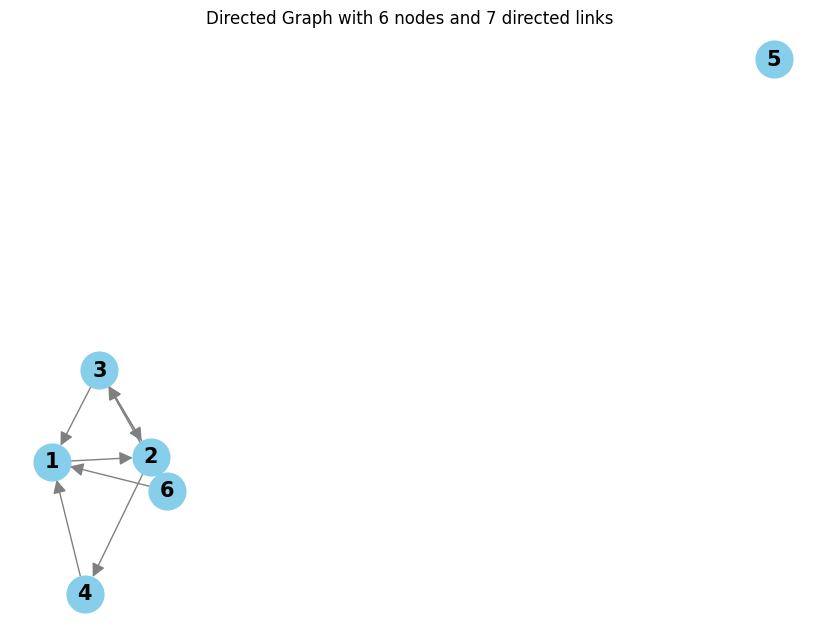

0.6388888888888888

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add nodes to the graph
nodes = [1, 2, 3, 4, 5, 6]
G.add_nodes_from(nodes)

# Add edges (links) to the graph
edges = [(1, 2), (2, 3), (4, 1), (6, 3), (6, 1), (3, 1), (2, 4), (3, 2)]
G.add_edges_from(edges)

print(G)

#Undirected links
plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_size=700, node_color="skyblue", edge_color="gray", font_size=15, font_weight="bold")
plt.title("Undirected Graph with 6 nodes and 7 links")
#plt.show()


# Create a new directed graph instance
DG = nx.DiGraph()

# Add nodes to the graph
DG.add_nodes_from(nodes)

# Add directed edges (links) to the graph
DG.add_edges_from(edges)

# Visualize the directed graph
plt.figure(figsize=(8, 6))
nx.draw(DG, with_labels=True, node_size=700, node_color="skyblue", edge_color="gray", font_size=15, font_weight="bold", arrowsize=20)
plt.title("Directed Graph with 6 nodes and 7 directed links")
plt.show()

# Determine the average clustering coefficient of the network shown in
# Remember to remove dedundant 2,3 ; 3,2 in UNdirected graphs
average_clustering_coefficient = nx.average_clustering(G)
average_clustering_coefficient
# Result 0.2778.



If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? 

And the link list?
The adjacency matrices before and after the switch remain the same. This is because the structural properties of the graph are unchanged; only the node labels are swapped.

What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?
1. Isolated Nodes
2. Adjacency matrix it is easier to spot the neighbors of a node. Whereas in edge list you have to traverse the entire list to identify all neighbors

In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

* answer 5 with undirected graphs 7 if it is directed (remember the redundant edges)

In [52]:
def find_paths_of_length(graph, start, end, length):
    if length == 0:
        return [[start]] if start == end else []
    
    paths = []
    for neighbor in graph.neighbors(start):
        for path in find_paths_of_length(graph, neighbor, end, length - 1):
            if path[0] == start:
                continue
            paths.append([start] + path)
    
    return paths

# Paths for the undirected graph
paths_undirected = find_paths_of_length(G, 1, 3, 3)

# Paths for the directed graph
paths_directed = find_paths_of_length(DG, 1, 3, 3)

len(paths_undirected), len(paths_directed)

(7, 0)

In [53]:
def find_cycles_from_node(graph, node, length):
    """Find all cycles of a given length starting and ending at a given node."""
    if length == 0:
        return [[node]] if node == node else []
    
    cycles = []
    for neighbor in graph.neighbors(node):
        for path in find_cycles_from_node(graph, neighbor, length - 1):
            if path[0] == node and len(set(path)) == length - 1:
                cycles.append([node] + path)
    
    return cycles

def count_cycles_of_length(graph, length):
    cycles = []
    for node in graph.nodes():
        cycles.extend(find_cycles_from_node(graph, node, length))
    # Each cycle is counted 'length' times
    return len(cycles) // length

# Counting cycles of length 4 for both G and DG
num_cycles_undirected_corrected = count_cycles_of_length(G, 4)
num_cycles_directed_corrected = count_cycles_of_length(DG, 4)

num_cycles_undirected_corrected, num_cycles_directed_corrected


(0, 0)

- **2.5**: Consider the bipartite network of Image 2.21

Construct its adjacency matrix. 

In [54]:
from IPython.display import Image
Image(url='http://networksciencebook.com/images/ch-02/figure-2-21.jpg',width=800)


In [55]:
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np

# 1. Create an empty graph
B = nx.Graph()

# 2. Add nodes with the node attribute "bipartite"
B.add_nodes_from(['1', '2', '3', '4', '5', '6'], bipartite=0)  # Add the node attribute "bipartite"
B.add_nodes_from(['7', '8', '9', '10', '11'], bipartite=1)

# 3. Add edges
B.add_edges_from([('1', '7'), ('7', '3'), ('3', '8'), ('3', '9'),('2','9'),('9','5'),('5','11'),('11','6'),('4','10'),('5','11')])

# 4. Check if the graph is bipartite 
is_bipartite = bipartite.is_bipartite(B)

# 5. Generate adjacency matrix directly
def generate_adjacency_matrix(graph):
    nodes = list(graph.nodes())
    n = len(nodes)
    adj_matrix = np.zeros((n, n), dtype=int)
    
    for i in range(n):
        for j in range(n):
            if graph.has_edge(nodes[i], nodes[j]):
                adj_matrix[i][j] = 1
                
    return adj_matrix

adj_matrix_direct = generate_adjacency_matrix(B)

print(is_bipartite)
print(adj_matrix_direct)

True
[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


 Why is it a block-diagonal matrix?

 A: Because of bipartite graphs where nodes within the same set don't connect. The ordering of nodes in the matrix such that all nodes from one set are listed consecutively, followed by nodes from the other set.

 

Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.


In [57]:
# Define the graph based on the provided code

# Create an empty graph
B_modified = nx.Graph()

# Add nodes with the node attribute "bipartite"
B_modified.add_nodes_from(['1', '2', '3', '4', '5', '6'], bipartite=0)
B_modified.add_nodes_from(['7', '8', '9', '10', '11'], bipartite=1)

# Add edges
B_modified.add_edges_from([('1', '7'), ('7', '3'), ('3', '8'), ('3', '9'),
                           ('2', '9'), ('9', '5'), ('5', '11'), ('11', '6'),
                           ('4', '10'), ('5', '11')])

# Generate the bipartite projections
purple_projection = bipartite.projected_graph(B_modified, purple_nodes)
green_projection = bipartite.projected_graph(B_modified, green_nodes)

# Generate adjacency matrices for the projections
adj_matrix_purple = generate_adjacency_matrix(purple_projection)
adj_matrix_green = generate_adjacency_matrix(green_projection)

adj_matrix_purple, adj_matrix_green


(array([[0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [1, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 1, 0]]),
 array([[0, 1, 1, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 1, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]]))

In [63]:
# Calculate the average degree for purple and green nodes in the bipartite graph

# Degrees for purple and green nodes
degrees_purple = [B_modified.degree(node) for node in purple_nodes]
degrees_green = [B_modified.degree(node) for node in green_nodes]

# Calculate average degrees
average_degree_purple = sum(degrees_purple) / len(purple_nodes)
average_degree_green = sum(degrees_green) / len(green_nodes)

average_degree_purple, average_degree_green



(1.5, 1.8)

In [64]:
# Calculate the average degree for purple and green nodes in their respective projections

# Degrees for purple nodes in the purple projection
degrees_purple_projection = [purple_projection.degree(node) for node in purple_nodes]

# Degrees for green nodes in the green projection
degrees_green_projection = [green_projection.degree(node) for node in green_nodes]

# Calculate average degrees for the projections
average_degree_purple_projection = sum(degrees_purple_projection) / len(purple_nodes)
average_degree_green_projection = sum(degrees_green_projection) / len(green_nodes)

average_degree_purple_projection, average_degree_green_projection


(1.6666666666666667, 1.6)

 Is it surprising that the values are different from those obtained in point (c)?
 
 In the bipartite graph, a node's degree is its direct connections. In the projection, it's about shared neighbors. So, nodes can end up with more connections in the projections.
Surprising? Not really. Since projections show shared relationships, the degrees can increase, making the average different from the original bipartite graph.

Bipartite network with 6 nodes in one set and 5 nodes in the other, connected by 10 links.
Bipartite Networks - General Considerations
Consider a bipartite network with N1 and N2 nodes in the two sets.

- **Q**:What is the maximum number of links Lmax the network can have?
L 
max
​
 =N 
1
​
 ×N 
2

- **Q**:How many links cannot occur compared to a non-bipartite network of size N = N1 + N2 ?
- **Q**:If N1‹‹N2 , what can you say about the network density, that is the total number of links over the maximum number of links, Lmax?
- **Q**:Find an expression connecting N1, N2 and the average degree for the two sets in the bipartite network, 〈k1〉 and 〈k2〉.

> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

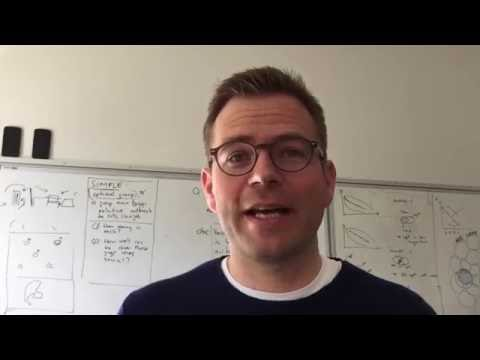

In [ ]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450)

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 
> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

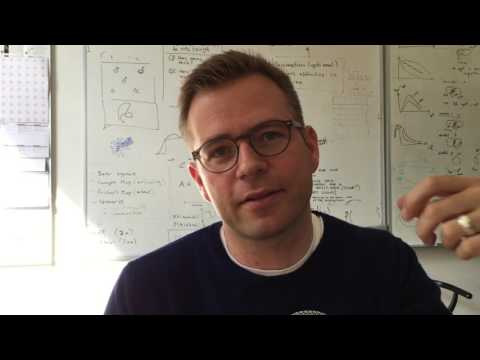

In [ ]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450)

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)